<a href="https://colab.research.google.com/github/SachinMallapur/ISFA1/blob/main/Isfa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#Set  style
sns.set(style='whitegrid')

In [ ]:
def readcsv(filepath,filename):
  import os
  os.chdir(filepath)
  file=pd.read_excel(filename)

  return file

filepath="/content/drive/MyDrive/kle"
filename="startup_funding138.xlsx"
df=readcsv(filepath,filename)
  #print(df.head(3))


In [ ]:
print(pd.DataFrame(df.head(3)))

   SNo                 Date   StartupName  Industry_Vertical  \
0    0  2017-01-08 00:00:00      TouchKin         Technology   
1    1  2017-02-08 00:00:00       Ethinos         Technology   
2    2  2017-02-08 00:00:00  Leverage Edu  Consumer Internet   

                                     SubVertical City_Location  \
0                       Predictive Care Platform     Bangalore   
1                       Digital Marketing Agency        Mumbai   
2  Online platform for Higher Education Services     New Delhi   

                                      Investors_Name  InvestmentType  \
0                                        Kae Capital  Private Equity   
1                         Triton Investment Advisors  Private Equity   
2  Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...    Seed Funding   

   Amount_In_INR Remarks  
0      1300000.0     NaN  
1            NaN     NaN  
2            NaN     NaN  


In [ ]:
#Inspect first five rows
print('First five rows')
print(df.head())


#basic info
print("\nDataset Info")
print(df.info())

#check for mising values
print("\nMissing Values:")
print(df.isnull().sum())

First five rows
   SNo                 Date   StartupName  Industry_Vertical  \
0    0  2017-01-08 00:00:00      TouchKin         Technology   
1    1  2017-02-08 00:00:00       Ethinos         Technology   
2    2  2017-02-08 00:00:00  Leverage Edu  Consumer Internet   
3    3  2017-02-08 00:00:00          Zepo  Consumer Internet   
4    4  2017-02-08 00:00:00  Click2Clinic  Consumer Internet   

                                     SubVertical City_Location  \
0                       Predictive Care Platform     Bangalore   
1                       Digital Marketing Agency        Mumbai   
2  Online platform for Higher Education Services     New Delhi   
3                         DIY Ecommerce platform        Mumbai   
4                  healthcare service aggregator     Hyderabad   

                                      Investors_Name  InvestmentType  \
0                                        Kae Capital  Private Equity   
1                         Triton Investment Advisors  Priv

In [ ]:
import pandas as pd

# Re-define the readcsv function and load the data
def readcsv(filepath,filename):
  import os
  os.chdir(filepath)
  file=pd.read_excel(filename)
  return file

filepath="/content/drive/MyDrive/kle"
filename="startup_funding138.xlsx"
df=readcsv(filepath,filename)

# Fill missing values with appropriate values
df['Industry_Vertical'] = df['Industry_Vertical'].fillna('Others')
df['SubVertical'] = df['SubVertical'].fillna('Not Specified')
df['City_Location'] = df['City_Location'].fillna('Not Specified')
df['Investors_Name'] = df['Investors_Name'].fillna('Undisclosed')

# Convert the 'Date' column to datetime and handle errors ('coerce' will turn invalid dates into NaT)
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Extract the year and month from the 'Date' column
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Display the column names to verify the changes
df.columns

Index(['SNo', 'Date', 'StartupName', 'Industry_Vertical', 'SubVertical',
       'City_Location', 'Investors_Name', 'InvestmentType', 'Amount_In_INR',
       'Remarks', 'Year', 'Month'],
      dtype='object')

In [ ]:

#Apply the function to the Amount column
df['Amount_In_INR'] = df['Amount_In_INR'].fillna(df['Amount_In_INR'].median())

In [ ]:
#Save cleaned data
df.to_csv("cleaned_startup_funding.csv",index=False)

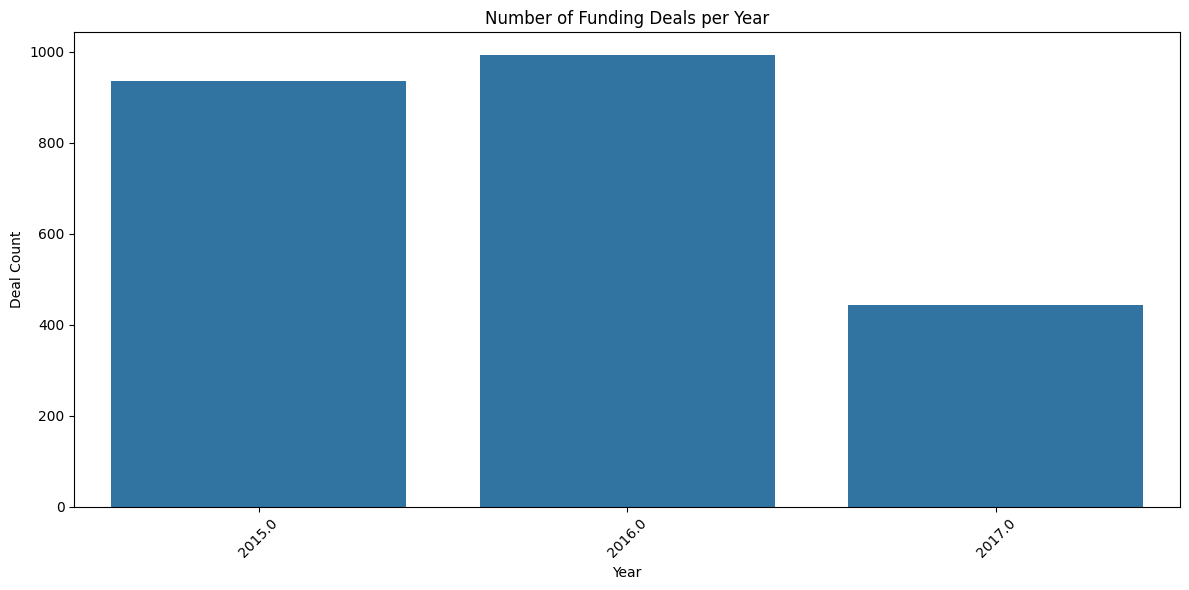

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#Number of deals per year
plt.figure(figsize=(12, 6))
sns.countplot(x='Year', data=df)
plt.title('Number of Funding Deals per Year')
plt.xlabel('Year')
plt.ylabel('Deal Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

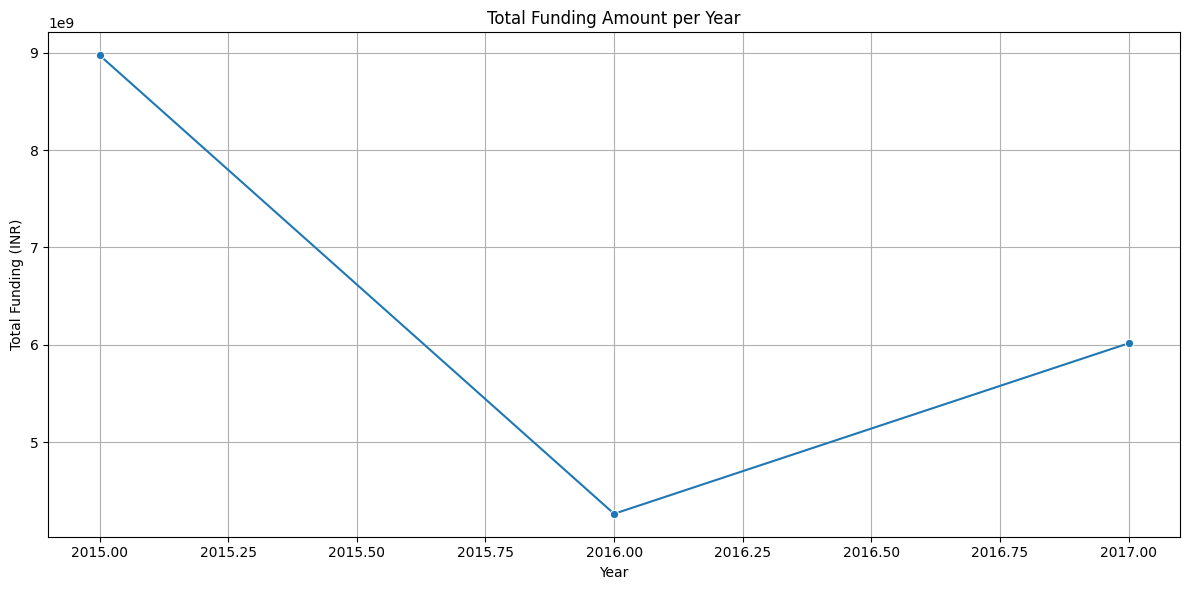

In [ ]:
#Total funding per year

yearly_funding = df.groupby('Year')['Amount_In_INR'].sum().reset_index()

plt.figure(figsize=(12, 6))

sns.lineplot(x='Year', y='Amount_In_INR', data=yearly_funding, marker='o')

plt.title("Total Funding Amount per Year")

plt.xlabel("Year")

plt.ylabel("Total Funding (INR)")

plt.grid(True)

plt.tight_layout()

plt.show()

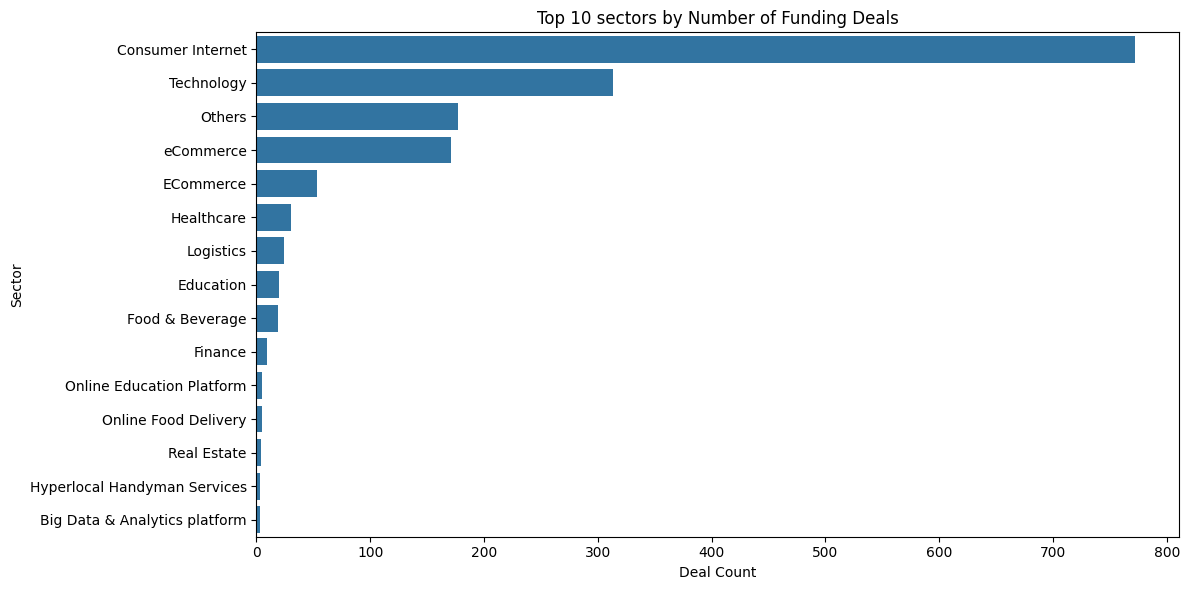

In [ ]:
#top sectors by deal count
top_sectors = df['Industry_Vertical'].value_counts().head(15)
plt.figure(figsize=(12,6))
sns.barplot(x=top_sectors.values ,y=top_sectors.index)
plt.title('Top 10 sectors by Number of Funding Deals')
plt.xlabel('Deal Count')
plt.ylabel('Sector')
plt.tight_layout()
plt.show()

/tmp/ipython-input-11-2628995028.py:2: FutureWarning: Series.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  df['Industry_Vertical'] = df['Industry_Vertical'].replace({'ECommerce','E-Commerce'})


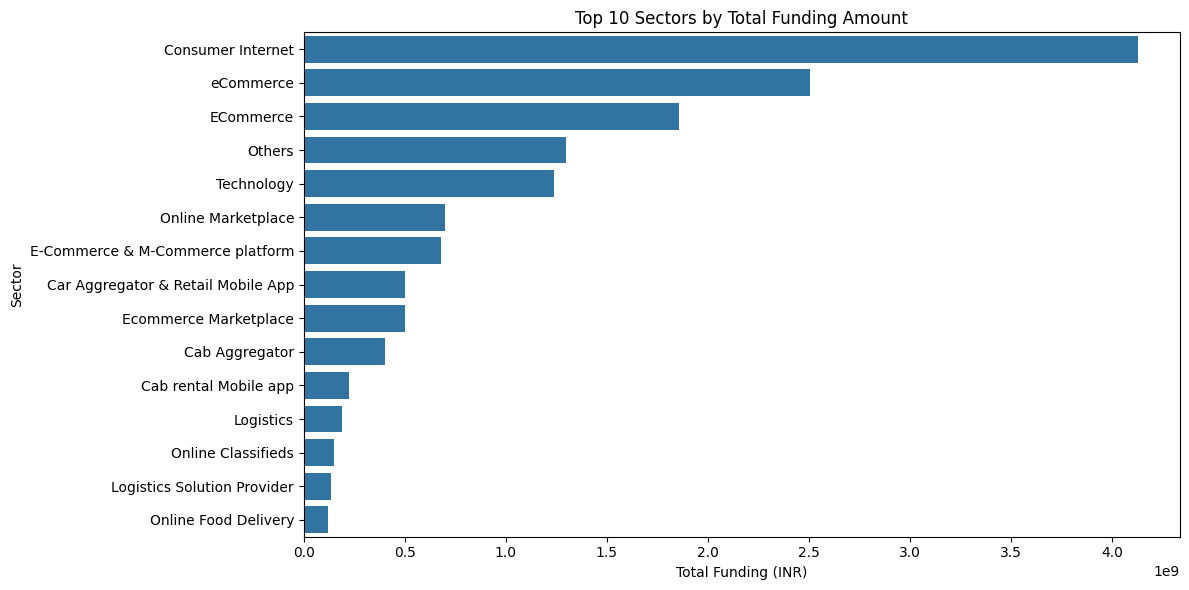

In [ ]:
#Top sectors by total Funding
df['Industry_Vertical'] = df['Industry_Vertical'].replace({'ECommerce','E-Commerce'})
sector_funding = df.groupby('Industry_Vertical')['Amount_In_INR'].sum().sort_values(ascending=False).head(15)
plt.figure(figsize=(12,6))
sns.barplot(x=sector_funding.values, y=sector_funding.index)
plt.title('Top 10 Sectors by Total Funding Amount')
plt.xlabel('Total Funding (INR)')
plt.ylabel('Sector')
plt.tight_layout()
plt.show()

In [ ]:
#Split multiple investors and count
investors_df = df[['StartupName','Investors_Name','Amount_In_INR']].copy()
investors_df['Investors_Name'] = investors_df['Investors_Name'].str.split(',')
investors_df = investors_df.explode('Investors_Name').dropna()
investors_df['Investors_Name'] = investors_df['Investors_Name'].str.strip().str.title()


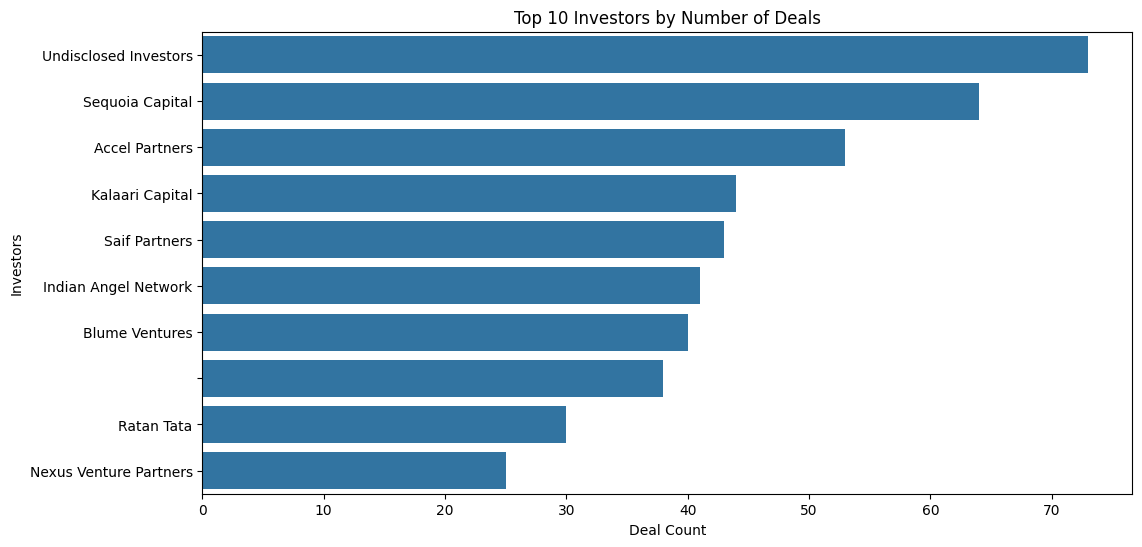

In [ ]:
#Top investors by number of deals
top_investors_deals=investors_df['Investors_Name'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_investors_deals.values, y=top_investors_deals.index)
plt.title("Top 10 Investors by Number of Deals")
plt.xlabel("Deal Count")
plt.ylabel("Investors")
plt.show()

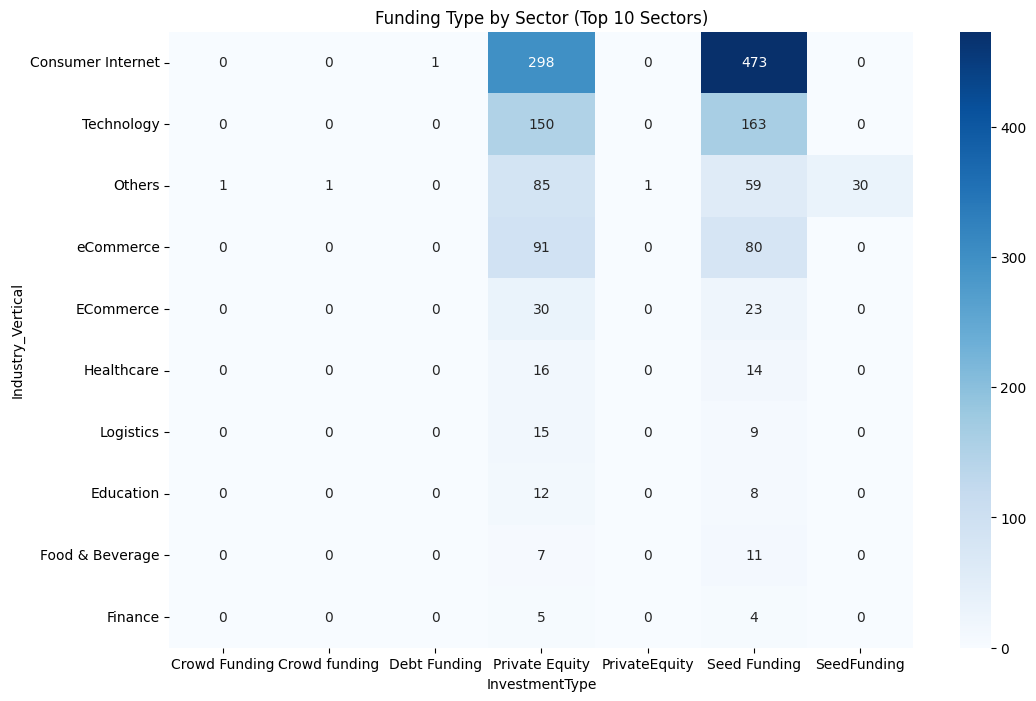

In [ ]:
sector_stage =  pd.crosstab(df['Industry_Vertical'], df ["InvestmentType"])
sector_stage =  sector_stage.loc[sector_stage.sum(axis=1).sort_values(ascending=False).head(10).index]
plt.figure(figsize=(12, 8))
sns.heatmap(sector_stage, annot=True, fmt="d", cmap="Blues")
plt.title("Funding Type by Sector (Top 10 Sectors)")
plt.show()

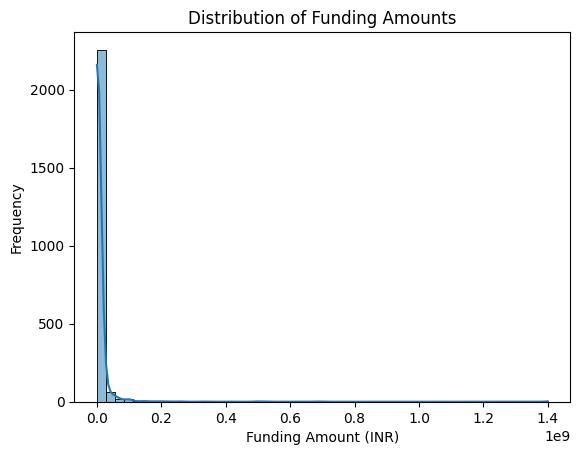

In [ ]:
sns.histplot(df['Amount_In_INR'], bins=50, kde=True)
plt.title('Distribution of Funding Amounts')
plt.xlabel('Funding Amount (INR)')
plt.ylabel('Frequency')
plt.show()

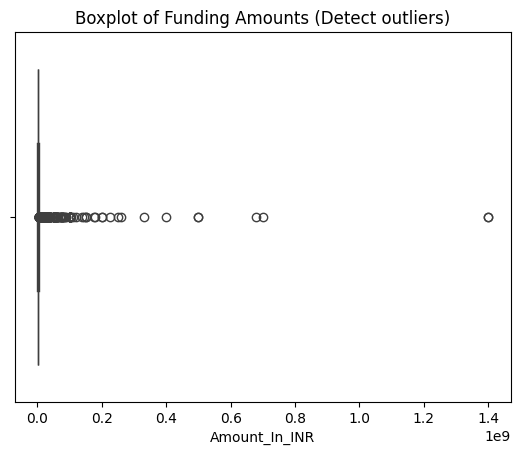

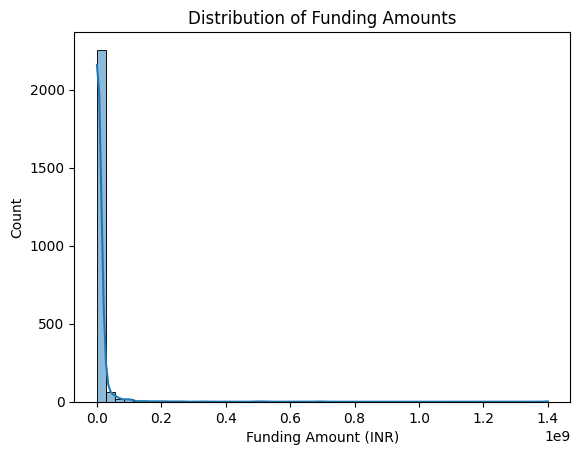

In [ ]:
sns.boxplot(x=df['Amount_In_INR'])
plt.title('Boxplot of Funding Amounts (Detect outliers)')
plt.show()
sns.histplot(df['Amount_In_INR'], bins=50,  kde=True)
plt.title('Distribution of Funding Amounts')
plt.xlabel('Funding Amount (INR)')
plt.show()

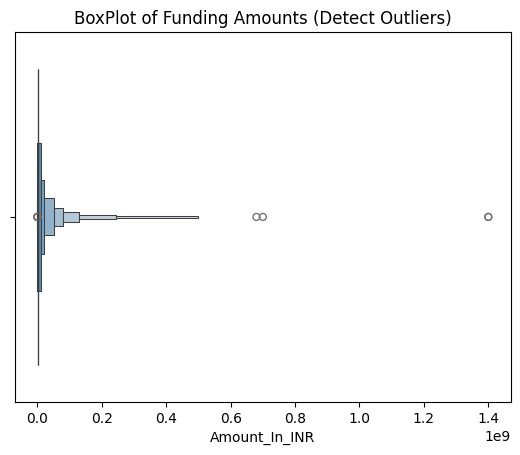

In [ ]:
sns.boxenplot(x=df['Amount_In_INR'])
plt.title('BoxPlot of Funding Amounts (Detect Outliers)')
plt.show()

In [ ]:
investors_df = df[['StartupName','Investors_Name','Amount_In_INR']].copy()
investors_df['Investors_Name'] = investors_df['Investors_Name'].str.split(',')
investors_df = investors_df.explode('Investors_Name').dropna()
investors_df['Investors_Name'] = investors_df['Investors_Name'].str.strip().str.title()

In [ ]:
def classify_investor(name):
  name= name.lower()
  if any(word in name for word in['capital','ventures','partners','fund','vc','labs']):
    return 'VC'
  elif any(word in name for word in['angel','network']):
    return 'Angel'
  elif any(word in name for word in ['corp','limited','pvt','ltd','inc']):
    return 'Corporate'
  else:
    return 'Other'


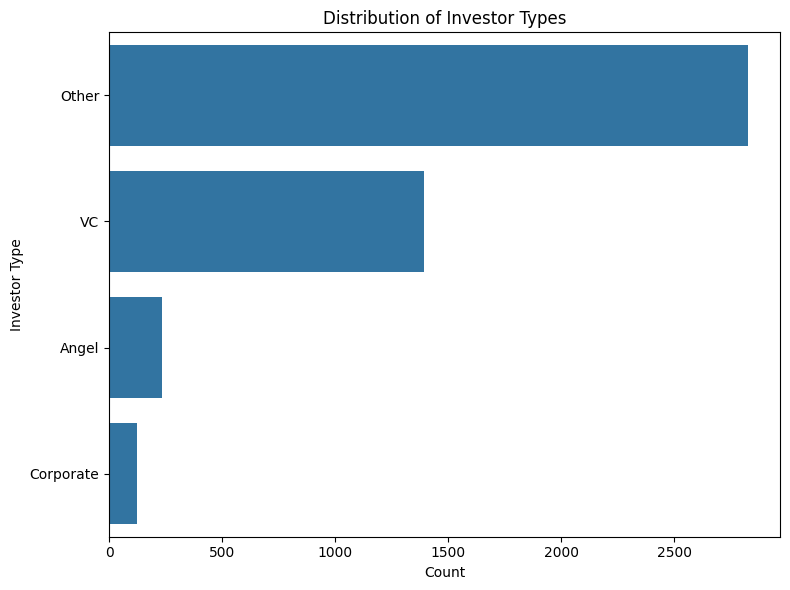

In [ ]:
investors_df['Investor_Type'] = investors_df['Investors_Name'].apply(classify_investor)
investor_Type_counts = investors_df['Investor_Type'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=investor_Type_counts.values, y=investor_Type_counts.index)
plt.title('Distribution of Investor Types')
plt.xlabel('Count')
plt.ylabel('Investor Type')
plt.tight_layout()
plt.show()

In [ ]:
# Group by Startup and year,then compute cumulate funding
startup_growth =df.groupby(['StartupName','Year'])['Amount_In_INR'].sum().unstack(fill_value=0).cumsum()

#Select top 5 funded startups
top_startups = startup_growth.sum(axis=1).sort_values(ascending=False).head(5).index

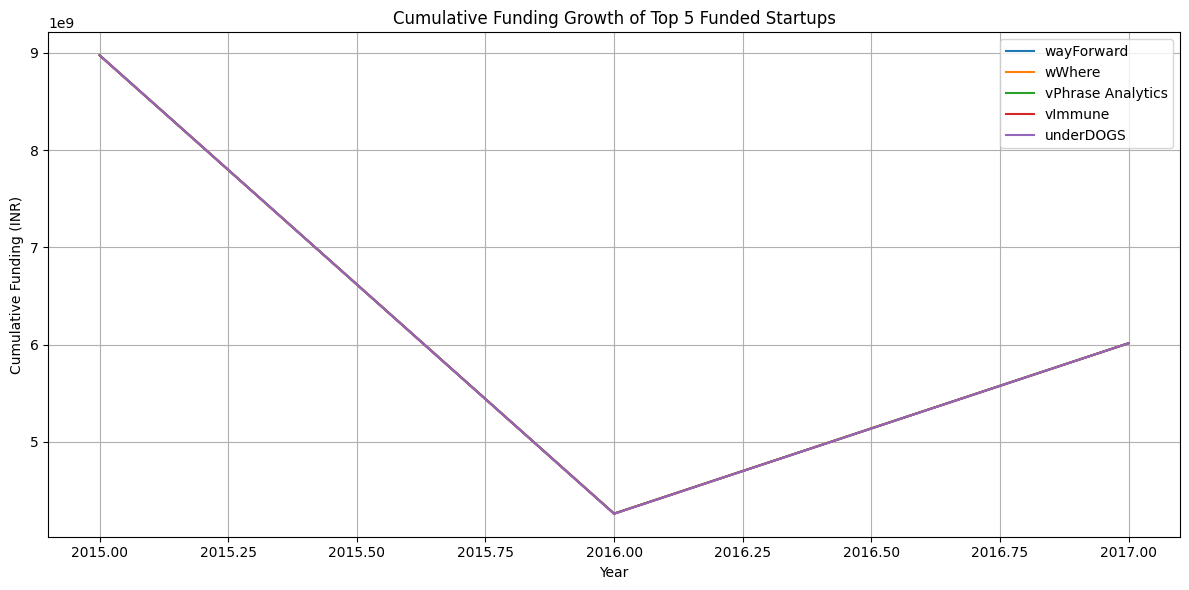

In [ ]:
plt.figure(figsize=(12, 6))
for startup in top_startups:
  plt.plot(startup_growth.columns, startup_growth.loc[startup].values, label=startup)
plt.title('Cumulative Funding Growth of Top 5 Funded Startups')
plt.xlabel('Year')
plt.ylabel('Cumulative Funding (INR)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
investors_df = df[['StartupName','Investors_Name']].copy()
investors_df['Investors_Name'] = investors_df['Investors_Name'].str.split(',')
investors_df = investors_df.explode('Investors_Name').dropna()
investors_df['Investors_Name'] = investors_df['Investors_Name'].str.strip().str.title()

In [ ]:
# Count how many times an investor invested in the same startups
investor_startup_count = investors_df.groupby(['Investors_Name','StartupName']).size().reset_index(name ='DealCount')
repeat_investors = investor_startup_count[investor_startup_count['DealCount']>1]
repeat_investors_summary = repeat_investors['Investors_Name'].value_counts().head(10)

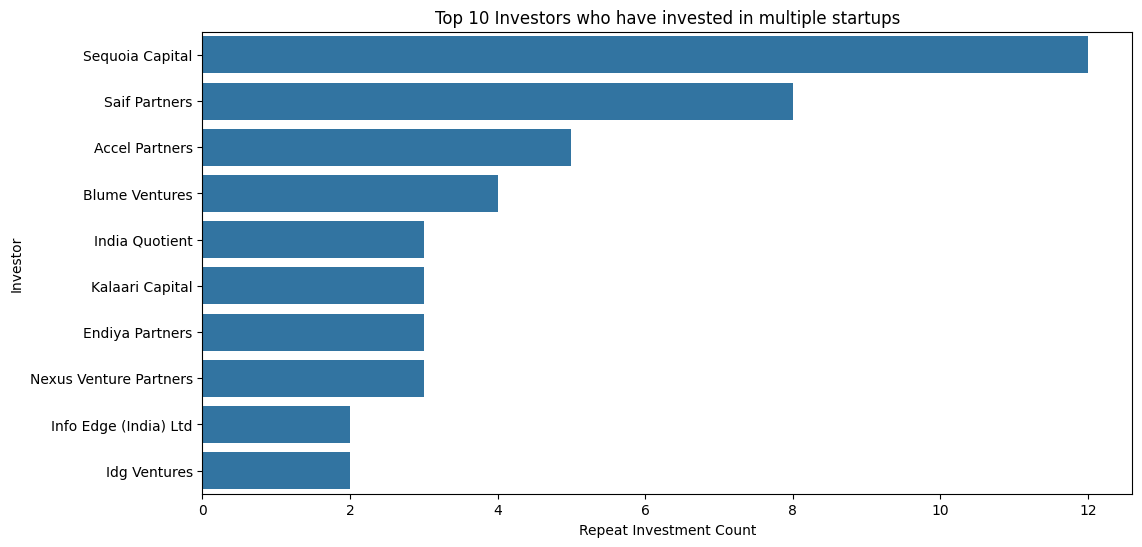

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=repeat_investors_summary.values, y=repeat_investors_summary.index)
plt.title('Top 10 Investors who have invested in multiple startups')
plt.xlabel("Repeat Investment Count")
plt.ylabel("Investor")
plt.show()


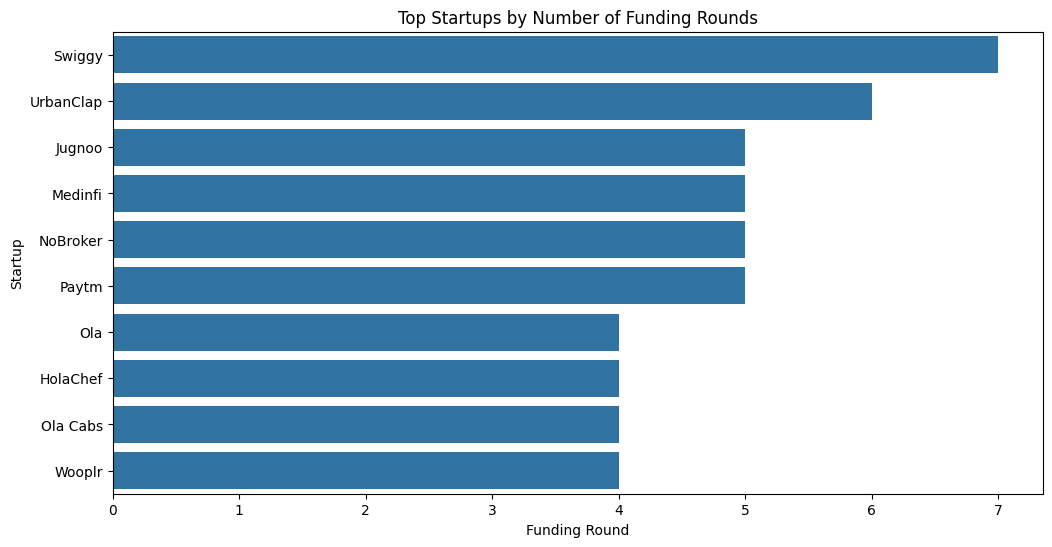

In [ ]:
startup_rounds = df.groupby('StartupName').size().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=startup_rounds.values, y=startup_rounds.index)
plt.title("Top Startups by Number of Funding Rounds")
plt.xlabel("Funding Round")
plt.ylabel("Startup")
plt.show()

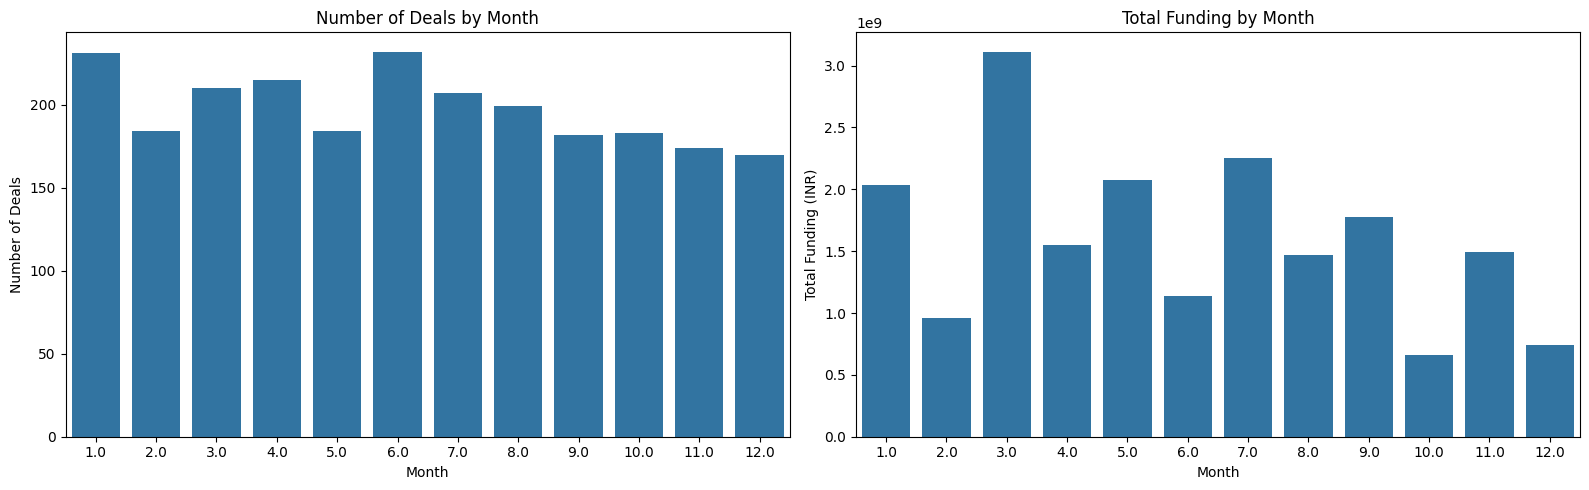

In [ ]:
  df['Month']= df['Date'].dt.month
monthly_deals= df['Month'].value_counts().sort_index()
monthly_funding = df.groupby('Month')['Amount_In_INR'].sum()

fig, ax=plt.subplots(1,2,figsize=(16,5))
sns.barplot(x=monthly_deals.index,y=monthly_deals.values,ax=ax[0])
ax[0].set_title('Number of Deals by Month')
ax[0].set_xlabel('Month')
ax[0].set_ylabel('Number of Deals')

sns.barplot(x=monthly_funding.index,y=monthly_funding.values,ax=ax[1])
ax[1].set_title('Total Funding by Month')
ax[1].set_xlabel('Month')
ax[1].set_ylabel('Total Funding (INR)')

plt.tight_layout()
plt.show()

In [ ]:
def readcsv(filepath,filename):
  import os
  os.chdir(filepath)
  file=pd.read_excel(filename)

  return file

filepath="/content/drive/MyDrive/kle"
filename="startup_funding138.xlsx"
df1=readcsv(filepath,filename)


Undisclosed Deals:847
Disclosed Deals:1525


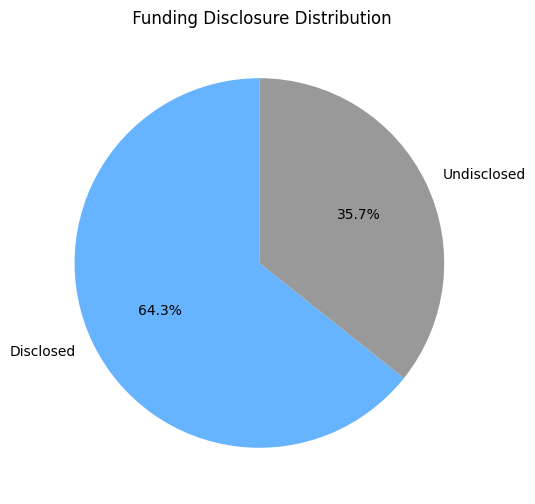

In [ ]:
undisclosed_deals = df1[df1['Amount_In_INR'].isna()]
disclosed_deals = df1[df1['Amount_In_INR'].notna()]
print(f"Undisclosed Deals:{len(undisclosed_deals)}")
print(f"Disclosed Deals:{len(disclosed_deals)}")

labels = ['Disclosed', 'Undisclosed']
sizes = [len(disclosed_deals), len(undisclosed_deals)]
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90,colors=['#66b3ff','#999999'])
plt.title(' Funding Disclosure Distribution')
plt.show()
